### 494. Target Sum leetcode

In [ ]:
class Solution:
    def findTargetSumWays(self, nums: List[int], target: int) -> int:
        def rec(ind, T):
            if ind == 0:
                if T + nums[0] == 0 and T - nums[0] == 0:   # case of zero +0 and -0 constitute 2 ways
                    return 2
                elif  T + nums[0] == 0 or T - nums[0] == 0:
                    return 1
                else:
                    return 0

            if dp[ind][T] != -1:
                return dp[ind][T]

            plus = rec(ind-1,T+nums[ind])
            minus = rec(ind-1,T-nums[ind])           
            dp[ind][T] = plus+minus
            return dp[ind][T]


        sum = 0
        for i in nums:
            sum+=i

        n = len(nums)
        dp = [[-1 for _ in range(2*(sum+1))] for _ in range(n)] # space doubled for negative index
        return rec(n-1,target)

### 518. Coin Change II

In [ ]:

class Solution:
    def change(self, amount: int, coins: List[int]) -> int:
        def rec(ind, T):
            if ind == 0:
                if T % coins[0] == 0:
                    return 1
                else:
                    return 0
            if dp[ind][T] != -1:
                return dp[ind][T]
            not_take = rec(ind-1,T)
            take_s,take_m = 0,0
            if coins[ind] <= T:
                # always for problems of repeated selection we will not change the index for take
                take_s = rec(ind,T-coins[ind])
                # take_m = rec(ind-1,T-coins[ind])
            dp[ind][T] =  take_s+not_take
            return dp[ind][T]
        if amount == 0:
            return 1
        dp = [[-1 for _ in range(amount+1)] for _ in range(len(coins))]
        output =  rec(len(coins)-1, amount)
        if output == float("inf"):
            return -1
        return output

# unbounded Knapsack gfg

In [1]:
class Solution:
    def knapSack(self, val, wt,capacity):
        def rec(ind,b_wt):
            if ind == 0:
                return (b_wt // wt[0]) * val[0]
            if dp[ind][b_wt] != -1:
                return dp[ind][b_wt]
            not_pick = 0 + rec(ind-1,b_wt)
            pick = -float("inf")
            if wt[ind] <= b_wt:
                pick = val[ind] + rec(ind,b_wt-wt[ind])
            dp[ind][b_wt] = max(pick,not_pick)
            return dp[ind][b_wt]
        
        dp = [[-1 for _ in range(W+1)] for _ in range(len(wt))]
        
        return rec(len(wt)-1, W)

# rod cutting GFG
<pre>
Approach

In [ ]:
"""
#User function Template for python3

class Solution:
    def cutRod(self, price):
        # code here
        
        def rec(ind,N):
            if ind == 0:
                return N * price[0]
            if dp[ind][N] != -1:
                return dp[ind][N]
            not_pick = rec(ind-1,N)
            pick = -float("inf")
            # rod_len = 
            if (ind+1) <= N:
                pick = price[ind] + rec(ind,N-(ind+1))
            dp[ind][N] = max(pick,not_pick)
            return dp[ind][N]
        
         
        dp = [[-1 for _ in range(len(price)+1)] for _ in range(len(price))]
        return rec(len(price)-1, len(price))
        
        
        # dp = [[0 for _ in range(len(price)+1)] for _ in range(len(price))]
        prev = [0 for _ in range(len(price)+1)]
        curr = [0 for _ in range(len(price)+1)]
        for i in range(len(price)+1):
            prev[i] = i*price[0]
        
        for ind in range(1,len(price)):
            for N in range(len(price)+1):
                not_pick = prev[N]
                pick = -float("inf")
            # rod_len = 
                if (ind+1) <= N:
                    pick = price[ind] + curr[N-(ind+1)]
                curr[N] = max(pick,not_pick)
            prev = curr.copy()
        
        return prev[len(price)]
"""
class Solution:
    def cutRod(self, price):
        n = len(price)
        dp = [0] * (n + 1)

        # Base case: filling dp with 0th index (length 1 rod)
        for rod_len in range(n + 1):
            dp[rod_len] = rod_len * price[0]

        for ind in range(1, n):
            for rod_len in range(n + 1):
                not_pick = dp[rod_len]
                pick = float('-inf')
                if ind + 1 <= rod_len:
                    pick = price[ind] + dp[rod_len - (ind + 1)]
                dp[rod_len] = max(pick, not_pick)

        return dp[n]


## Dp on strings

### 1143. Longest Common Subsequence

<pre>
Approaches -- 2 ways
Approach 1
general approach is that generate all subsequences of each string and check the longest common subsequence

Approach 2
check and generate
for this you need two indexes ind1, ind2 acts as pointer for both strings s1, s2 

s1 = cfd || s2 = ecd
initiall we pass i1= 2 and i2 = 2 // len-1
f(2,2)
d == d
return 1 + f(i1-1,i2-1) // we added one because we found length 1

f(1,1)
f != c
then two case we consider max of that 
you may reduce i1 or i2
return max(f(i1-1,i2),f(i1,i2-1))

then what is the base case some time i1 goes to -1 or i2 goes to -1 at that case return 0




In [ ]:
class Solution:

    """
    # memoization

    def longestCommonSubsequence(self, text1: str, text2: str) -> int:
        def rec(ind1,ind2):
            if ind1 < 0 or ind2 < 0:
                return 0
            if dp[ind1][ind2] != -1:
                return dp[ind1][ind2]

            if text1[ind1] == text2[ind2]:
                dp[ind1][ind2] = 1 + rec(ind1-1,ind2-1)
                return dp[ind1][ind2]
            dp[ind1][ind2] =0 +  max(rec(ind1,ind2-1),rec(ind1-1,ind2))
            return dp[ind1][ind2]
        
        dp = [[-1 for _ in range(len(text2))] for _ in range(len(text1))]

        return rec(len(text1)-1,len(text2)-1)
        
        # has a problem to convert to DP why base case 
        if ind1 < 0 or ind2 < 0:
                return 0
        # we can't represent negative in dp for tabulation then what is the solution ?

        we can shift the array and such that i is considered as i-1 

        we pass i but it does operatio of i-1

        in base condition we are checking ind<0 : changes to ind-1 < 0 ==> ind == 0
         condition changes to if 
         ind1 = 0 or ind2 = 0:
                return 0

        """


    def longestCommonSubsequence(self, text1: str, text2: str) -> int:
    # this can bbe converted to DP
        def rec(ind1,ind2):
            if ind1 == 0 or ind2 == 0:
                return 0
            if dp[ind1][ind2] != -1:
                return dp[ind1][ind2]

            if text1[ind1-1] == text2[ind2-1]:
                dp[ind1][ind2] = 1 + rec(ind1-1,ind2-1)
                return dp[ind1][ind2]
            dp[ind1][ind2] =0 +  max(rec(ind1,ind2-1),rec(ind1-1,ind2))
            return dp[ind1][ind2]
        
        dp = [[-1 for _ in range(len(text2)+1)] for _ in range(len(text1)+1)]

        return rec(len(text1),len(text2))

### Print Longest subsequence
![WhatsApp Image 2025-05-03 at 15.08.31_9165bf69.jpg](<attachment:WhatsApp Image 2025-05-03 at 15.08.31_9165bf69.jpg>)
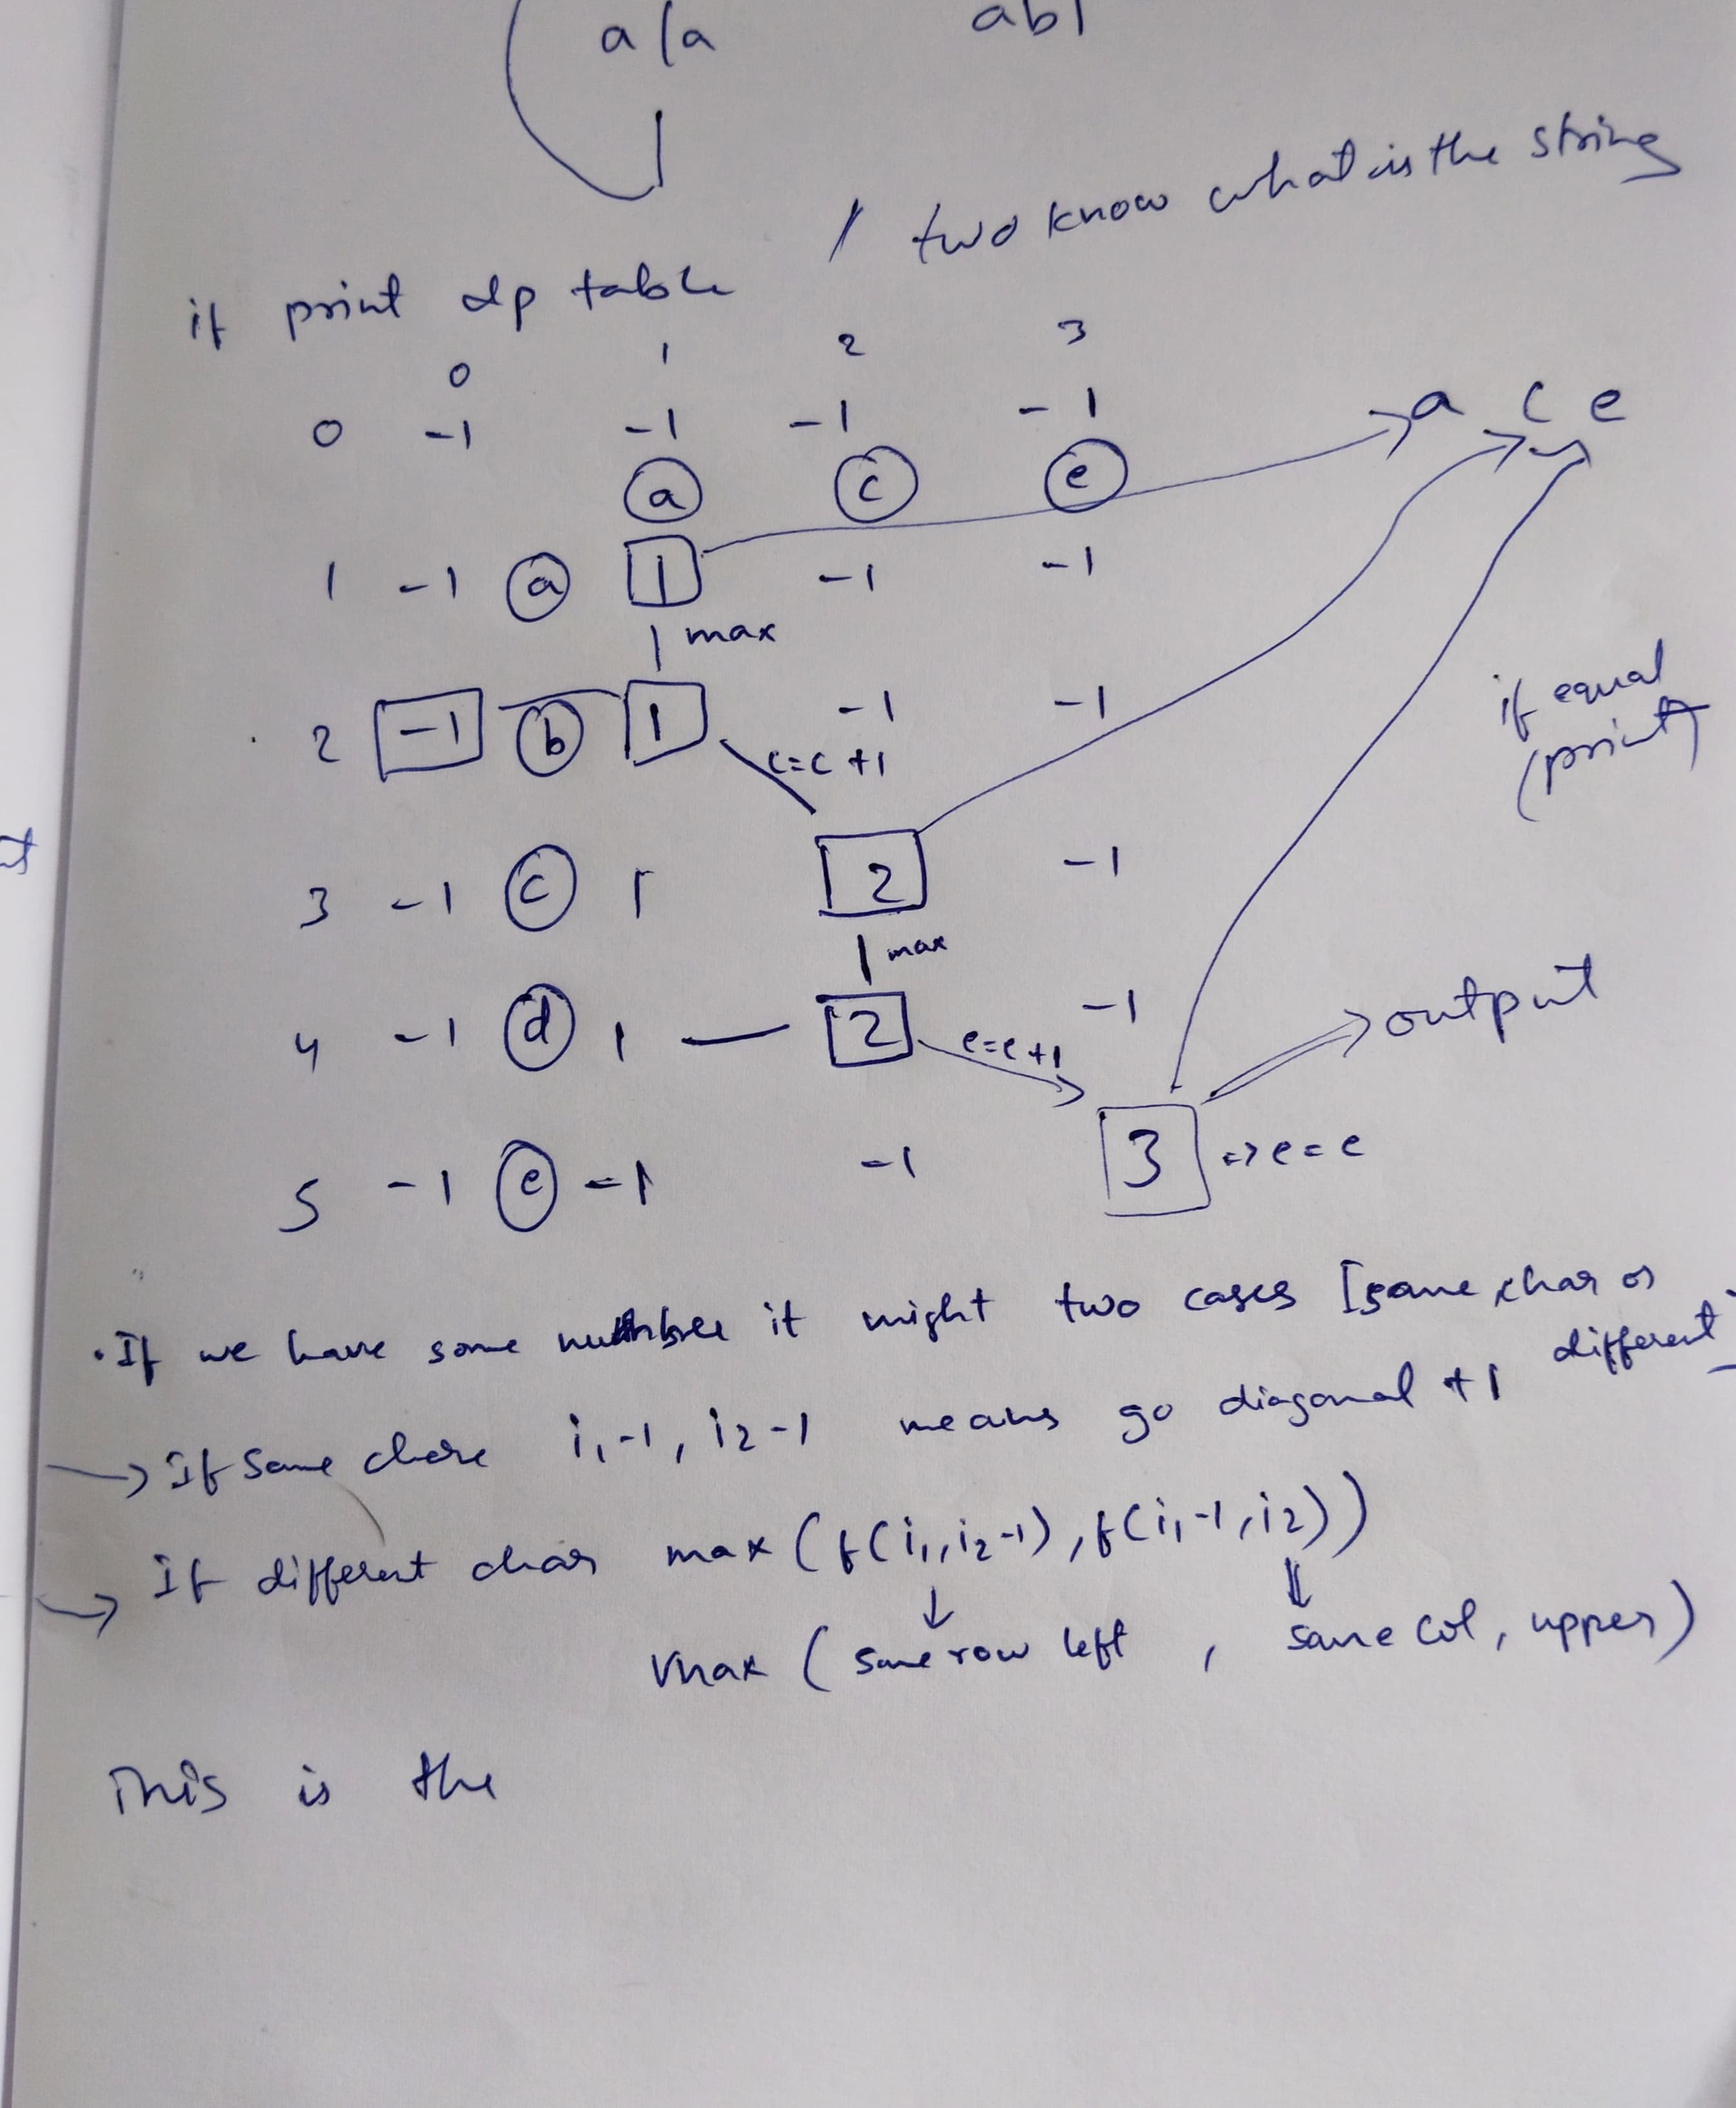

### longest common substring (not subsequence) -- GFG
https://www.geeksforgeeks.org/problems/longest-common-substring1452/1
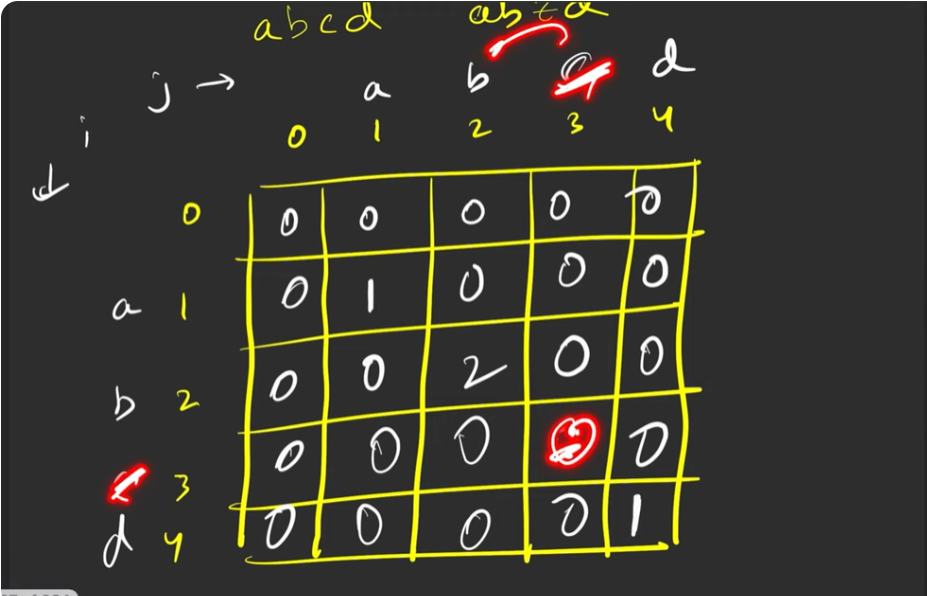

## if match daigonal upper +1 else 0

In [ ]:

class Solution:
    def longestCommonSubstr(self, s1, s2):
        # code here
        dp = [[0 for _ in range(len(s2)+1)] for _ in range(len(s1)+1)]
        ans = 0
        for i in range(1,len(s1)+1):
            for j in range(1, len(s2)+1):
                if s1[i-1] == s2[j-1]:
                    dp[i][j] = dp[i-1][j-1] + 1 
                else:
                    dp[i][j] = 0
                ans = max(ans,dp[i][j])
        return ans

# longest palindromic subsequece
516. Longest Palindromic Subsequence <br>
catch is that use LCS(longest common subsequence) for given string and reverse string

In [2]:
class Solution:
    def longestPalindromeSubseq(self, s: str) -> int:
        def rec(ind1,ind2):
            if ind1<0 or ind2<0:
                return 0
            if dp[ind1][ind2] != -1:
                return dp[ind1][ind2]
            if s1[ind1] == s2[ind2]:
                dp[ind1][ind2] = 1+rec(ind1-1,ind2-1)
                return dp[ind1][ind2]
            dp[ind1][ind2] = max(rec(ind1-1,ind2), rec(ind1,ind2-1))
            return dp[ind1][ind2]
        n = len(s)
        s1 = s
        s2 = s[::-1]
        dp = [[-1 for _ in range(n)] for _ in range(n)]
        output = rec(n-1,n-1)
        return output

# 1312. Minimum Insertion Steps to Make a String Palindrome
![WhatsApp Image 2025-05-03 at 16.47.45_475b2efc.jpg](<attachment:WhatsApp Image 2025-05-03 at 16.47.45_475b2efc.jpg>)
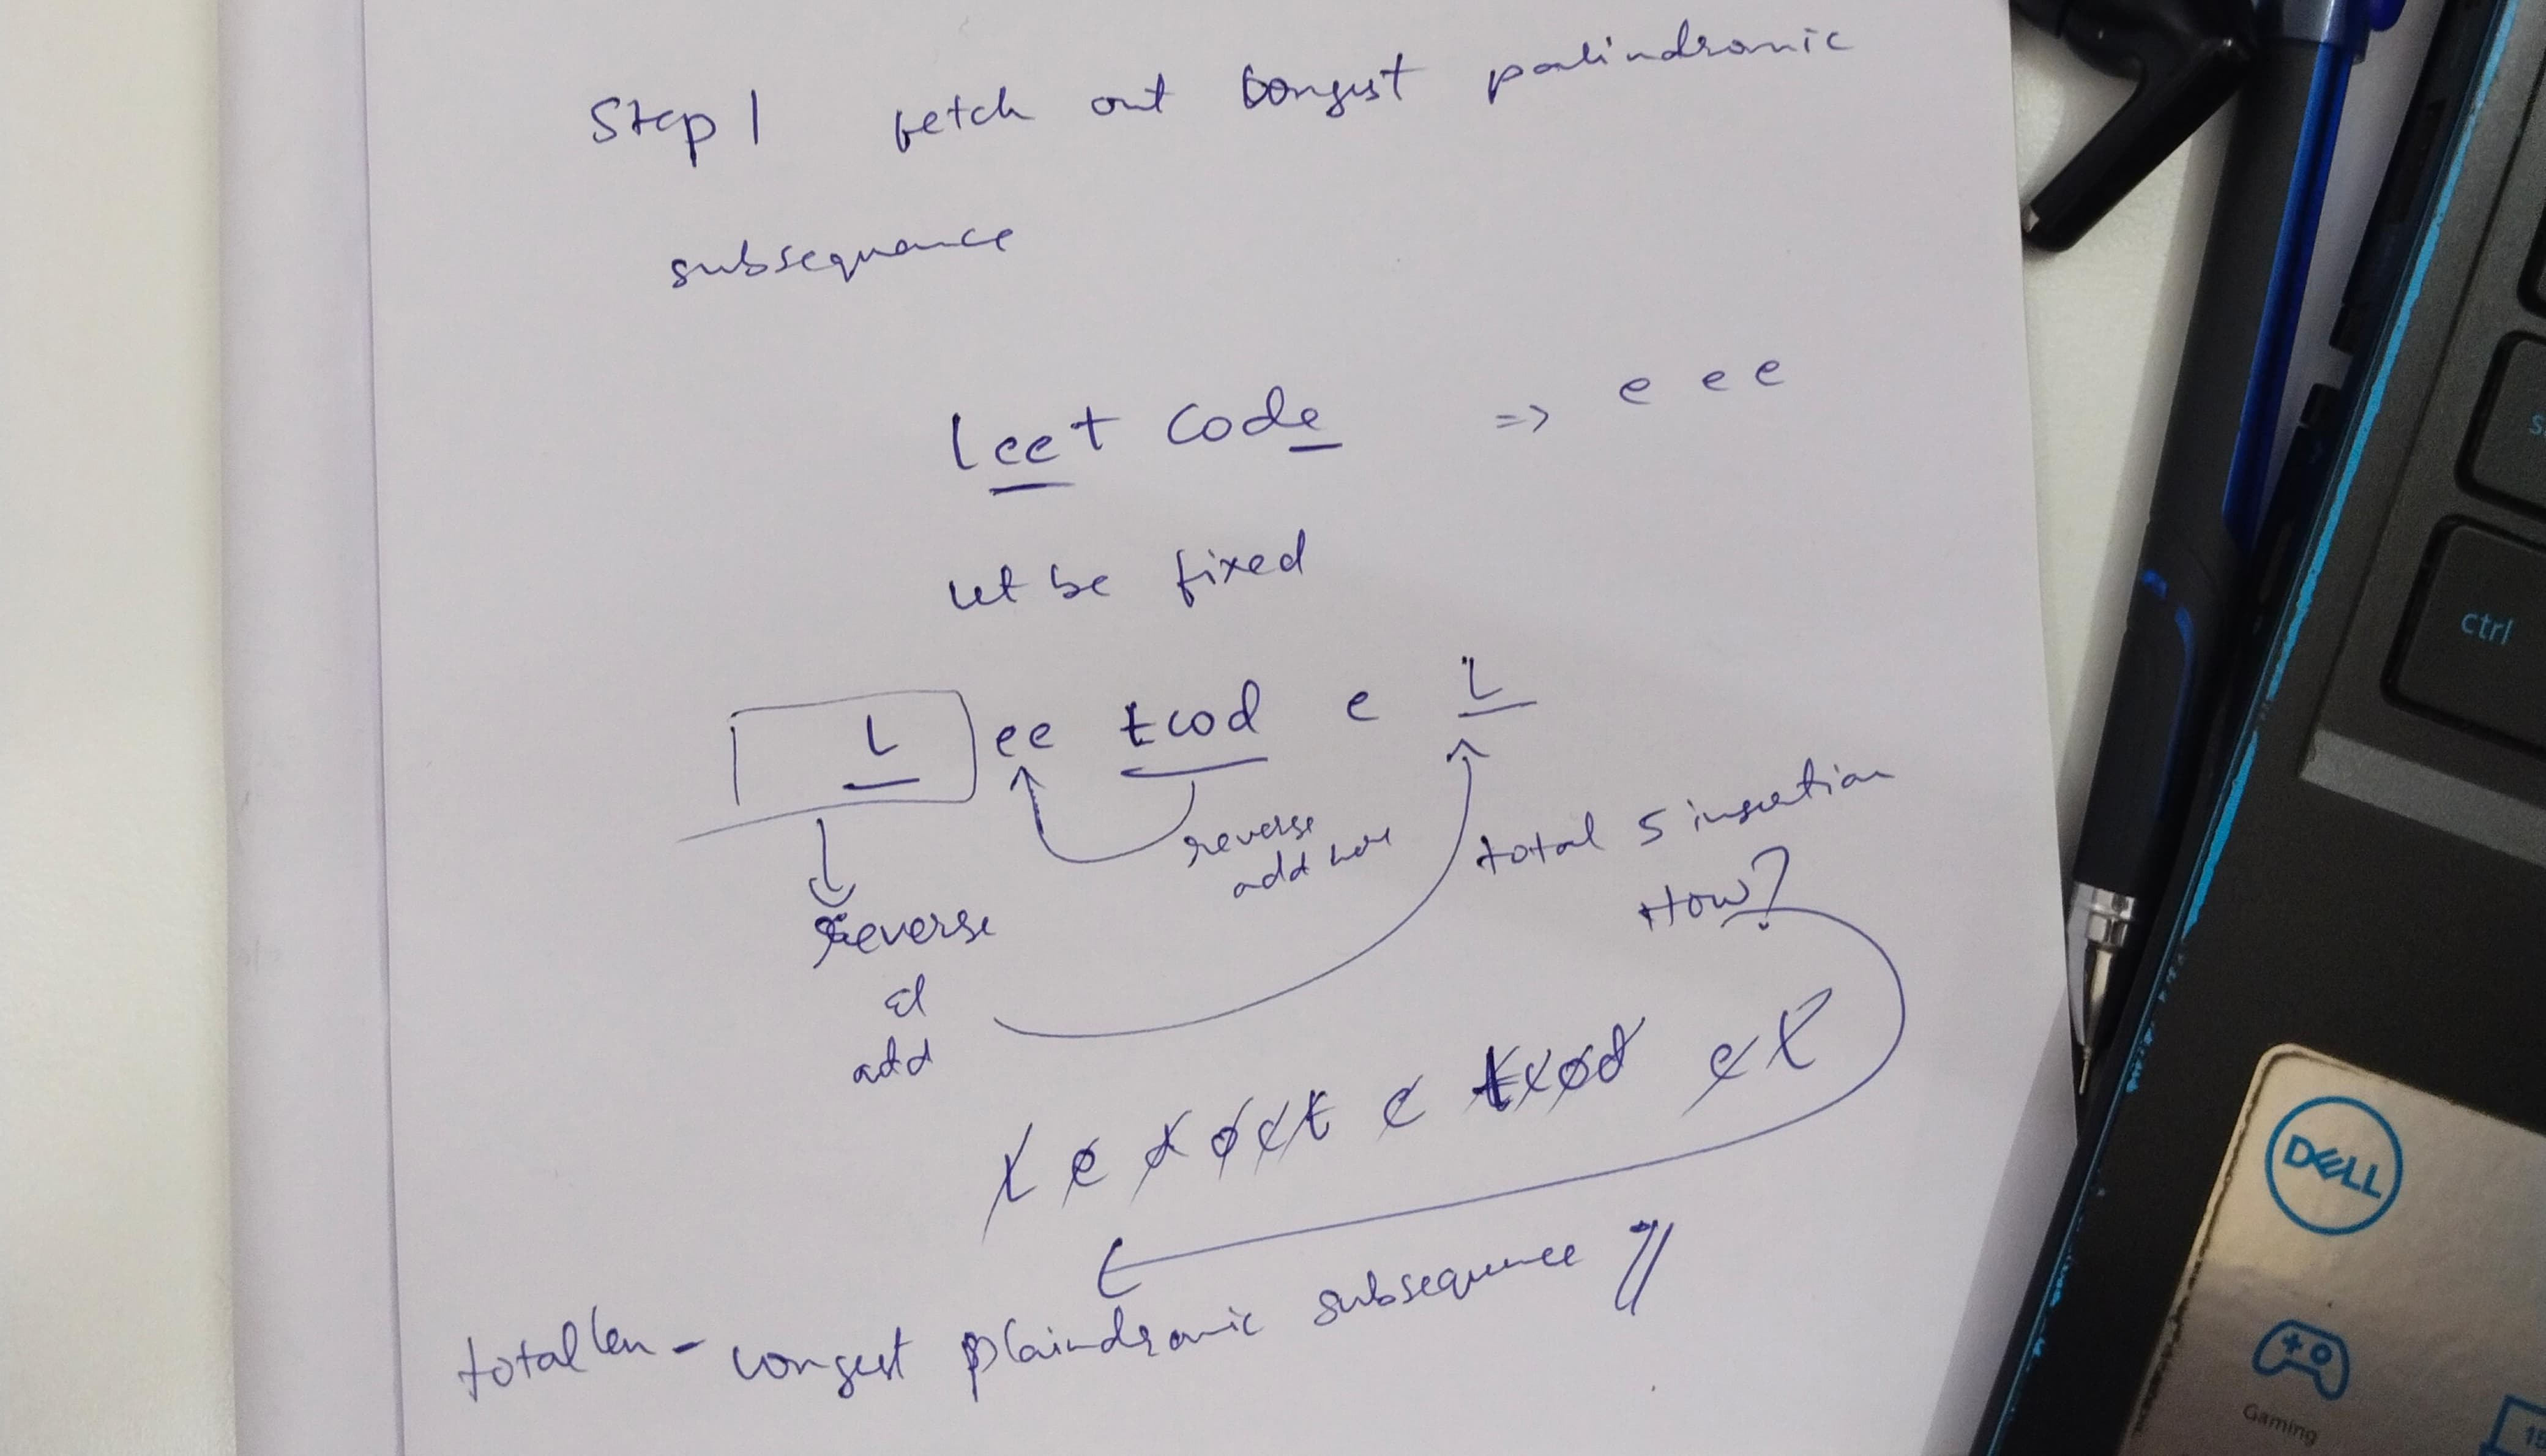

In [ ]:
class Solution:
    def minInsertions(self, s: str) -> int:
        # LCS
        def rec(i1,i2):
            if i1 < 0 or i2 < 0:
                return 0
            if dp[i1][i2] != -1:
                return dp[i1][i2]
            if s1[i1] == s2[i2]:
                dp[i1][i2] = 1 + rec(i1-1,i2-1)
                return dp[i1][i2]
            dp[i1][i2] = max(rec(i1-1,i2),rec(i1,i2-1))
            return dp[i1][i2] 

        n = len(s)
        s1 = s
        s2 = s[::-1]        
        dp = [[-1 for _ in range(n)] for _ in range(n)]
        #  checking for palindromic count
        output = rec(n-1,n-1)
        
        return n - output

### minimum operation to make two strings equal by inserting or deleting
583. Delete Operation for Two Strings

In [ ]:
class Solution:
    def minDistance(self, word1: str, word2: str) -> int:
        #LCS
        def rec(i,j):
            if i<0 or j<0:
                return 0
            if dp[i][j] != -1:
                return dp[i][j]
            if word1[i] == word2[j]:
                dp[i][j] = 1 + rec(i-1,j-1) 
                return dp[i][j]
            dp[i][j] = max(rec(i-1,j),rec(i,j-1))
            return dp[i][j]
        n = len(word1)
        m = len(word2)
        dp = [[-1 for _ in range(m)] for _ in range(n)]
        output = rec(n-1,m-1)
        return m+n - (2*output)

### 1092. Shortest Common Supersequence 
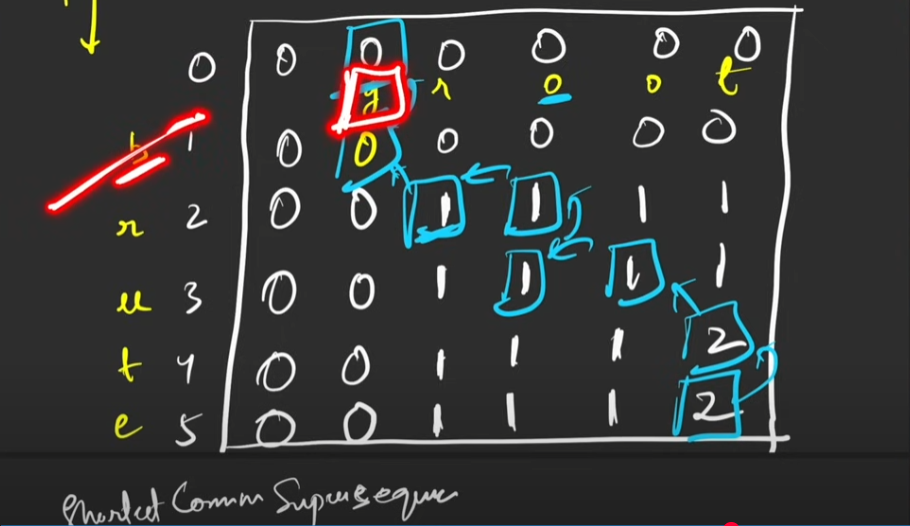
<pre>
if same add once to ans and i-1,j-1
else add the min side element to ans and move max side. update i,j accordingly

after if and i>0 or j>0:
    add elements to ans
atlast reverse the ans

In [ ]:
class Solution:
    def shortestCommonSupersequence(self, str1: str, str2: str) -> str:
        def rec(i,j):
            if i<0 or j<0:
                return 0
            if dp[i][j] != -1:
                return dp[i][j]
            if str1[i] == str2[j]:
                dp[i][j] = 1 + rec(i-1,j-1) 
                return dp[i][j]
            dp[i][j] = max(rec(i-1,j),rec(i,j-1))
            return dp[i][j]
        n = len(str1)
        m = len(str2)
        dp = [[-1 for _ in range(m)] for _ in range(n)]
        output = rec(n-1,m-1)
        print(f"output : {output}")
        dp.insert(0,[0]*m)
        for i in dp:
            i.insert(0,0)
            print(i)
        i = n 
        j = m
        ans = "" 
        while i>0 and j>0:
            if str1[i-1] == str2[j-1]:
                ans+=str1[i-1]
                i-=1
                j-=1
            elif dp[i-1][j] > dp[i][j-1]:
                ans += str1[i-1]
                i-=1 
            else:
                ans+=str2[j-1]
                j-=1

        
        while(i>0):
            ans+=str1[i-1]
            i-=1
        while j>0:
            ans+=str2[j-1]
            j-=1
                    

        return ans[::-1]

### 115. Distinct Subsequences
As question is about count different possibilites to be added
at base case return 0 or 1
<pre>

Approach 
s = babgbag, t = bag
i pointer points s, while j points t

what is rec(i,j) ?
upto 0->i in s how many distinct 0->j in t are there.

rec(n,m) means how many distinct t are there in s


g = g
then you have two chance can consider the current g or check for future g
rec(i-1,j-1)'consider this and check for remaining' + rec(i-1,j) 'i will not consider this check for future' # add both

if not equal you can't do anything just move futher the i.



In [ ]:
class Solution:
    def numDistinct(self, s: str, t: str) -> int:
        """
        # memoisation
        def rec(i,j):
            if j < 0:
                return 1
            elif i < 0: 
                return 0
            if dp[i][j] != -1:
                return dp[i][j]
            if s[i] == t[j]:
                dp[i][j] = rec(i-1,j-1)+rec(i-1,j)
                return dp[i][j]
            else:
                dp[i][j] = rec(i-1,j)
                return dp[i][j]
        n = len(s)
        m = len(t)
        dp=[[-1 for _ in range(m)] for _ in range(n)]
        return rec(n-1,m-1)
        

        # making and adjusting memoisation to support tabulation by shifting index

        def rec(i,j):
            if j == 0:
                return 1
            elif i == 0: 
                return 0
            if dp[i][j] != -1:
                return dp[i][j]
            if s[i-1] == t[j-1]:
                dp[i][j] = rec(i-1,j-1)+rec(i-1,j)
                return dp[i][j]
            else:
                dp[i][j] = rec(i-1,j)
                return dp[i][j]
        n = len(s)
        m = len(t)
        dp=[[-1 for _ in range(m+1)] for _ in range(n+1)]
        return rec(n,m)
        """
        # tabulation
        n = len(s)
        m = len(t)
        dp=[[0 for _ in range(m+1)] for _ in range(n+1)]
        
        #base case
        # already all are zero i = 0 means all row 0 
        # only to handle j= 0 and keep value = 1
        for i in range(n+1):
            dp[i][0] = 1
        for i in range(1,n+1) :
            for j in range(1,m+1):
                if s[i-1] == t[j-1]:
                    dp[i][j] = dp[i-1][j-1]+dp[i-1][j]
                else:
                    dp[i][j] = dp[i-1][j]
        return dp[n][m]

72. Edit Distance
<pre>
Given two strings word1 and word2, return the minimum number of operations required to convert word1 to word2.

You have the following three operations permitted on a word:

Insert a character
Delete a character
Replace a character </pre>
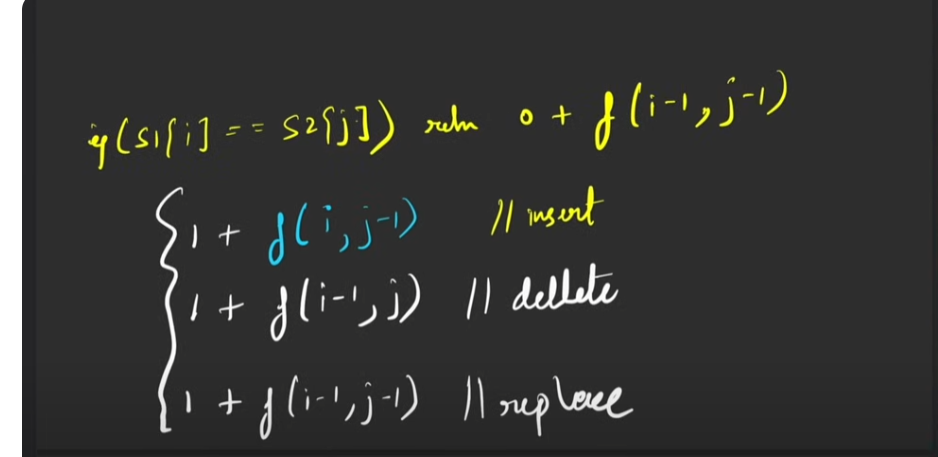
<br>
all possible operations 
<br>
base cases
<br>
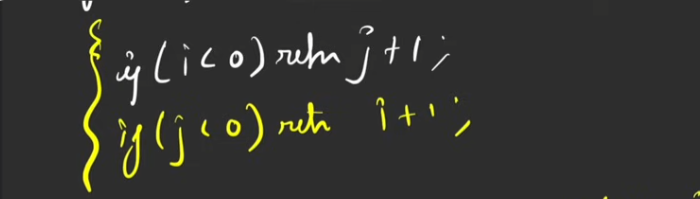

In [ ]:
class Solution:
    def minDistance(self, word1: str, word2: str) -> int:
        def rec(i,j):
            if i < 0:
                return j+1 # why because remaining in word2 as j is index we are returning j+1
            elif j < 0:
                return i+1 
            
            if word1[i] == word2[j]:
                return rec(i-1,j-1)
            else: # three operation 
                a = 1 + rec(i,j-1) # inserted
                b = 1 + rec(i-1,j) # deleted
                c = 1 + rec(i-1,j-1) # replace
                return min(a,b,c)
        
        return rec(len(word1)-1,len(word2)-1)

### 44. Wildcard Matching

In [ ]:
"""
Given an input string (s) and a pattern (p), implement wildcard pattern matching with support for '?' and '*' where:

'?' Matches any single character.
'*' Matches any sequence of characters (including the empty sequence).
The matching should cover the entire input string (not partial).
"""
class Solution:
    # proper explaination given in notebook
    def isMatch(self, s: str, p: str) -> bool:
        def rec(i,j):
            # i -> p, j-> s
            # base case 
            if i<0 and j<0: # this implies equal satisified
                return True
            elif i<0 and j>-1:
                return False
            elif i>-1 and j<0:
                for ind in range(0,i+1):
                    if p[ind] != "*":
                        return False
                return True
            
            if dp[i][j] != -1:
                return dp[i][j]

            # two cases match or not
            
            # match
            if p[i] == s[j] or p[i] == "?":
                dp[i][j] = rec(i-1,j-1)
                return dp[i][j]
            elif p[i] == "*":
                dp[i][j] = rec(i-1,j) or rec(i,j-1) 
                return dp[i][j]
            elif p[i] != s[j]:
                dp[i][j] = False
                return False
        n = len(p)
        m = len(s)
        dp = [[-1 for _ in range(m)]for _ in range(n)]
        return rec(n-1,m-1)

### 122. Best Time to Buy and Sell Stock II

In [ ]:
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        """   
        # memoization 

        def rec(i,buy):
            # buy = 1 means you are eligible to buy, 0  means you need to sell
            # base case
            if (i == len(prices)):
                return 0
            if dp[i][buy] != -1:
                return dp[i][buy]
            profit = 0
            if buy:
                # eligible to buy, but buy or not
                profit = max( -prices[i] +rec(i+1,0) ,0 + rec(i+1,1))
            else:
                # eligible to only sell, but you will sell or not
                profit = max(prices[i]+rec(i+1,1) ,0+rec(i+1,0))
            dp[i][buy] = profit
            return profit
        dp = [[-1 for _ in range(2)] for _ in range(len(prices))]
        return rec(0,1)
        """
        # tabulation
        dp = [[0 for _ in range(2)] for _ in range(len(prices)+1)]
        
        # base case
        dp[len(prices)][0] = 0
        dp[len(prices)][1] = 0

        for i in range(len(prices)-1,-1,-1):
            for buy in range(2):
                profit = 0
                if buy:
                    # eligible to buy, but buy or not
                    profit = max( -prices[i] +dp[i+1][0] ,0 + dp[i+1][1])
                else:
                    # eligible to only sell, but you will sell or not
                    profit = max(prices[i]+dp[i+1][1] ,0+dp[i+1][0])
                dp[i][buy] = profit
        return dp[0][1]

        

### 123. Best Time to Buy and Sell Stock III
You are given an array prices where prices[i] is the price of a given stock on the ith day.

Find the maximum profit you can achieve. You may complete at most two transactions.

Note: You may not engage in multiple transactions simultaneously (i.e., you must sell the stock before you buy again).

In [ ]:
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        """
        3-D Dp 
        def rec(i,buy, cap):
            if cap == 0:
                return 0
            if i == len(prices):
                return 0
            if dp[i][buy][cap] != -1:
                return dp[i][buy][cap]
            if buy:
                # can buy. or will not buy
                dp[i][buy][cap] = max(-prices[i]+rec(i+1,0,cap),rec(i+1,1,cap))
                return dp[i][buy][cap] 
            else:
                dp[i][buy][cap] = max(prices[i]+rec(i+1,1,cap-1),rec(i+1,0,cap))
                return dp[i][buy][cap] 
        
        """
        # i : 0-n-1 size(N)
        # bag : 0-1 size(2)
        # cap : 0-2 size(3)
        """

        dp = [[[-1 for _ in range(3)]for _ in range(2)]for _ in range(len(prices))]
        return rec(0,1,2)
        """

        """
        Question can i do in two dimensional? Yes! How?
        i need to do 4 operation Buy(0) sell(1) Buy(2) sell(3). Let instead of buy,cap
        use tranc_no. if even you can consider eligible to buy else eligible to sell. if ==4 -> 2 complete transactions completed
        """
        def rec(i,t_no):
            if t_no == 4:
                return 0
            if i == len(prices):
                return 0
            if dp[i][t_no] != -1:
                return dp[i][t_no]
            if t_no%2==0:
                # can buy. or will not buy
                dp[i][t_no] = max(-prices[i]+rec(i+1,t_no+1),rec(i+1,t_no))
                return dp[i][t_no] 
            else:
                dp[i][t_no] = max(prices[i]+rec(i+1,t_no+1),rec(i+1,t_no))
                return dp[i][t_no] 
        dp = [[-1 for _ in range(4)]for _ in range(len(prices))]
        return rec(0,0)

### 188. Best Time to Buy and Sell Stock IV
You are given an integer array prices where prices[i] is the price of a given stock on the ith day, and an integer k.

Find the maximum profit you can achieve. You may complete at most k transactions: i.e. you may buy at most k times and sell at most k times.

Note: You may not engage in multiple transactions simultaneously (i.e., you must sell the stock before you buy again).

can do atmost k transactions just make sure that cap = k or t_no = 2*k ( becaues each transaction includes two operations ) 

In [ ]:
class Solution:
    def maxProfit(self, k: int, prices: List[int]) -> int:
        """
        3-D Dp 
        def rec(i,buy, cap):
            if cap == 0:
                return 0
            if i == len(prices):
                return 0
            if dp[i][buy][cap] != -1:
                return dp[i][buy][cap]
            if buy:
                # can buy. or will not buy
                dp[i][buy][cap] = max(-prices[i]+rec(i+1,0,cap),rec(i+1,1,cap))
                return dp[i][buy][cap] 
            else:
                dp[i][buy][cap] = max(prices[i]+rec(i+1,1,cap-1),rec(i+1,0,cap))
                return dp[i][buy][cap] 
        
        """
        # i : 0-n-1 size(N)
        # bag : 0-1 size(2)
        # cap : 0-2 size(3)
        """

        dp = [[[-1 for _ in range(3)]for _ in range(2)]for _ in range(len(prices))]
        return rec(0,1,2)
        """

        """
        Question can i do in two dimensional? Yes! How?
        i need to do 4 operation Buy(0) sell(1) Buy(2) sell(3). Let instead of buy,cap
        use tranc_no. if even you can consider eligible to buy else eligible to sell. if ==4 -> 2 complete transactions completed
        """
        def rec(i,t_no):
            if t_no == k*2:
                return 0
            if i == len(prices):
                return 0
            if dp[i][t_no] != -1:
                return dp[i][t_no]
            if t_no%2==0:
                # can buy. or will not buy
                dp[i][t_no] = max(-prices[i]+rec(i+1,t_no+1),rec(i+1,t_no))
                return dp[i][t_no] 
            else:
                dp[i][t_no] = max(prices[i]+rec(i+1,t_no+1),rec(i+1,t_no))
                return dp[i][t_no] 
        dp = [[-1 for _ in range(k*2)]for _ in range(len(prices))]
        return rec(0,0)

### 309. Best Time to Buy and Sell Stock with Cooldown
You are given an array prices where prices[i] is the price of a given stock on the ith day.

Find the maximum profit you can achieve. You may complete as many transactions as you like (i.e., buy one and sell one share of the stock multiple times) with the following restrictions:

After you sell your stock, you cannot buy stock on the next day (i.e., cooldown one day).
Note: You may not engage in multiple transactions simultaneously (i.e., you must sell the stock before you buy again).

##### how can you deal with cool down
mean you can't immediately buy after sell so while selling if sell don't move immediate next index(i+1) but move to i+2. And edit some base cases. This
is modified version of Stock2

In [ ]:
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        def rec(i,buy):
            # buy = 1 means you are eligible to buy, 0  means you need to sell
            # base case
            if (i >= len(prices)):
                return 0
            if dp[i][buy] != -1:
                return dp[i][buy]
            profit = 0
            if buy:
                # eligible to buy, but buy or not
                profit = max( -prices[i] +rec(i+1,0) ,0 + rec(i+1,1))
            else:
                # eligible to only sell, but you will sell or not
                profit = max(prices[i]+rec(i+2,1) ,0+rec(i+1,0))
            dp[i][buy] = profit
            return profit
        dp = [[-1 for _ in range(2)] for _ in range(len(prices))]
        return rec(0,1)

### 714. Best Time to Buy and Sell Stock with Transaction Fee
You are given an array prices where prices[i] is the price of a given stock on the ith day, and an integer fee representing a transaction fee.

Find the maximum profit you can achieve. You may complete as many transactions as you like, but you need to pay the transaction fee for each transaction.

Note:

You may not engage in multiple transactions simultaneously (i.e., you must sell the stock before you buy again).
The transaction fee is only charged once for each stock purchase and sale.

simply for each sell completed subtract the fee from it modified version of stock II

In [ ]:
class Solution:
    def maxProfit(self, prices: List[int], fee: int) -> int:
        def rec(i,buy):
            # buy = 1 means you are eligible to buy, 0  means you need to sell
            # base case
            if (i >= len(prices)):
                return 0
            if dp[i][buy] != -1:
                return dp[i][buy]
            profit = 0
            if buy:
                # eligible to buy, but buy or not
                profit = max( -prices[i] +rec(i+1,0) ,0 + rec(i+1,1))
            else:
                # eligible to only sell, but you will sell or not
                profit = max(prices[i]+rec(i+1,1)-fee, 0+rec(i+1,0))
            dp[i][buy] = profit
            return profit
        dp = [[-1 for _ in range(2)] for _ in range(len(prices))]
        return rec(0,1)